# CS 4464/7643 Deep Learning HW 1

### Setup - Google Colab

Edit and run the cell below to setup the environment for Google Colab (and only for Google Colab).

In [ ]:
#Cell 1
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cell 2
%cd /content/drive/MyDrive/Colab Notebooks/HW1_DL/HW1Code-Spring2023/student_version/data
!sh get_data.sh
%cd ..

/content/drive/MyDrive/Colab Notebooks/HW1_DL/HW1Code-Spring2023/student_version/data
--2023-02-01 23:01:49--  https://pjreddie.com/media/files/mnist_train.csv
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109575994 (104M) [application/octet-stream]
Saving to: ‘mnist_train.csv.12’

mnist_train.csv.12  100%[===================>] 104.50M  32.6MB/s    in 3.2s    

2023-02-01 23:01:52 (32.6 MB/s) - ‘mnist_train.csv.12’ saved [109575994/109575994]

--2023-02-01 23:01:52--  https://pjreddie.com/media/files/mnist_test.csv
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18289443 (17M) [application/octet-stream]
Saving to: ‘mnist_test.csv.12’

mnist_test.csv.12   100%[===================>]  17.44M  19.0MB/s    in 0.9s    



### Setup - Local Environment (Mac)

Run the cell below **once** if using the suggested local environment (and only the local environment - Mac).

Then, change the ipykernel in the top right of this VS Code window to `dl_hw1`.

In [ ]:
#Cell 1
%conda env create -f ./local_environment/environment.yaml

ValueError: ignored

In [ ]:
#Cell 2
%cd 'PATH TO HW1 UNZIPPED FILES'/hw1/student_version/data
!sh get_data.sh
%cd ..

### Setup - Local Environment (Windows)

Run the cell below **once** if using the suggested local environment (and only the local environment - Windows).

Then, change the ipykernel in the top right of this VS Code window to `dl_hw1`.

In [ ]:
#Cell 1
%conda env create -f ./local_environment/environment.yaml

In [ ]:
#Cell 2
%cd User\'PATH TO HW1 UNZIPPED FILES'\hw1\student_version\data
! get_data.bat
%cd ..

### All the following are for both Google Colab and the suggested local environment. 

In [ ]:
# Cell 3
# Run all local tests in this block
# If you get an error saying test not found, add an __init__.py file in the
# tests directory
!python -m unittest tests.test_network
!python -m unittest tests.test_loading
!python -m unittest tests.test_activation
!python -m unittest tests.test_loss
!python -m unittest tests.test_training


..
----------------------------------------------------------------------
Ran 2 tests in 1.430s

OK
Loading training data...
Training data loaded with 60000 images
.Loading training data...
Training data loaded with 60000 images
.
----------------------------------------------------------------------
Ran 2 tests in 30.635s

OK
.....
----------------------------------------------------------------------
Ran 5 tests in 0.003s

OK
..
----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK
Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
...Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
.
----------------------------------------------------------------------
Ran 4 tests in 40.727s

OK


In [ ]:
#Cell 4
import yaml
import copy

from models import TwoLayerNet, SoftmaxRegression
from optimizer import SGD
from utils import load_mnist_trainval, load_mnist_test, generate_batched_data, train, evaluate, plot_curves

In [ ]:
# Cell 5
%matplotlib inline
def train_model(yaml_config_file):
  args = {}
  with open(yaml_config_file) as f:
      config = yaml.full_load(f)

  for key in config:
      for k, v in config[key].items():
          args[k] = v
  
  # Prepare MNIST data
  train_data, train_label, val_data, val_label = load_mnist_trainval()
  test_data, test_label = load_mnist_test()

  # Prepare model and optimizer
  if args["type"] == 'SoftmaxRegression':
      model = SoftmaxRegression()
  elif args["type"] == 'TwoLayerNet':
      model = TwoLayerNet(hidden_size=args["hidden_size"])
  optimizer = SGD(learning_rate=args["learning_rate"], reg=args["reg"])
  
  # Training Code
  train_loss_history = []
  train_acc_history = []
  valid_loss_history = []
  valid_acc_history = []
  best_acc = 0.0
  best_model = None
  for epoch in range(args["epochs"]):
      batched_train_data, batched_train_label = generate_batched_data(train_data, train_label, batch_size=args["batch_size"], shuffle=True)
      epoch_loss, epoch_acc = train(epoch, batched_train_data, batched_train_label, model, optimizer, args["debug"])

      train_loss_history.append(epoch_loss)
      train_acc_history.append(epoch_acc)
      # evaluate on test data
      batched_test_data, batched_test_label = generate_batched_data(val_data, val_label, batch_size=args["batch_size"])
      valid_loss, valid_acc = evaluate(batched_test_data, batched_test_label, model, args["debug"])
      if args["debug"]:
          print("* Validation Accuracy: {accuracy:.4f}".format(accuracy=valid_acc))

      valid_loss_history.append(valid_loss)
      valid_acc_history.append(valid_acc)

      if valid_acc > best_acc:
          best_acc = valid_acc
          best_model = copy.deepcopy(model)
  
  #Testing Code
  batched_test_data, batched_test_label = generate_batched_data(test_data, test_label, batch_size=args["batch_size"])
  _, test_acc = evaluate(batched_test_data, batched_test_label, best_model) # test the best model
  if args["debug"]:
      print("Final Accuracy on Test Data: {accuracy:.4f}".format(accuracy=test_acc))
  
  return train_loss_history, train_acc_history, valid_loss_history, valid_acc_history

In [ ]:
# Cell 6
# train softmax model
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_softmax.yaml")

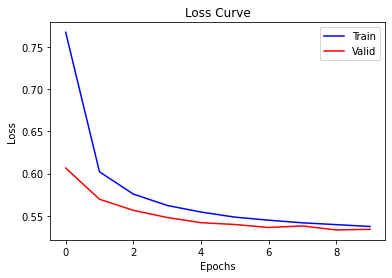

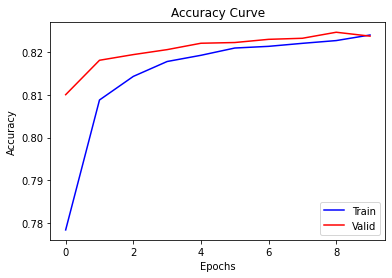

In [ ]:
# Cell 7
# plot results for softmax model
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 8
# train two layer neural network
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_twolayer.yaml")

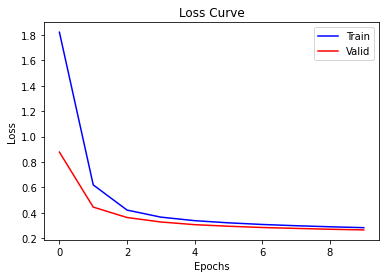

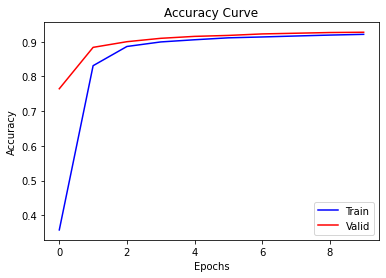

In [ ]:
# Cell 9
# plot two layer neural network
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

# **Assignment 1 Writeup**

- Name: Pierluigi Mancinelli
- GT Email: pmancinelli3@gatech.edu
- GT ID: 903865851



## Two Layer Neural Network

# Learning Rates

- Tune the Two Layer Neural Network with various learning rates (while keeping all other hyperparameters constant) by changing the config file.
  - lr = 1
  - lr = 1e-1
  - lr = 1e-2
  - lr = 5e-2


In [ ]:
# Cell 10
# Change lr to 1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

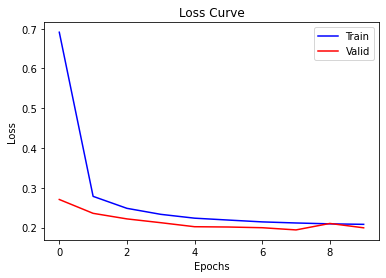

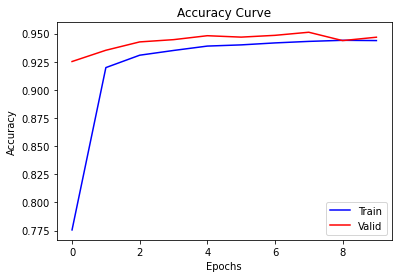

In [ ]:
# Cell 11
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 12
# Change lr to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

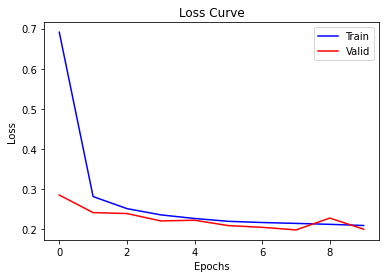

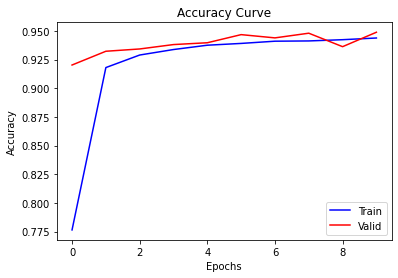

In [ ]:
# Cell 13
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 14
# Change lr to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

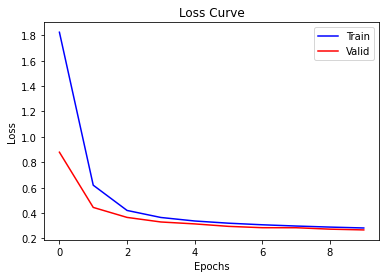

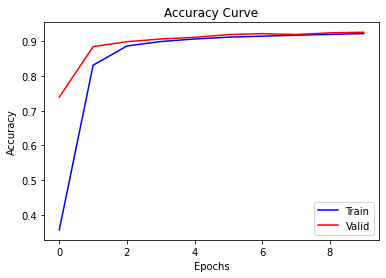

In [ ]:
# Cell 15
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 16
# Change lr to 5e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

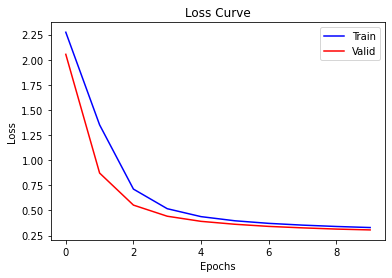

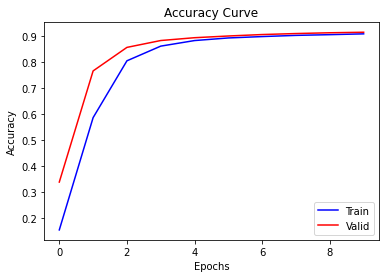

In [ ]:
# Cell 17
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here:

The learning rate has the role of setting a pace to the gradient update. When too high, it might lead to a derivative never converging but oscillating around the minima because of a large step. However, due to randomness and the dependence on the starting point, the same (large) learning rate might converge even if very high as shown when lr = 1. For the other cases, as we decrease lr, we definitely get to the minima paying the cost of having a slower descent. In fact, as shown for lr = 0.05, we get to converge after more epochs than in other cases. Moreover, as the lr decreases, accuracy minimally decreases since the gradient might be stuck in some local minima not getting to the global.

# Regularization

- Tune the Two Layer Neural Network with various regularization coefficients (while keeping all other hyperparameters constant) by changing the config file.
  
  - reg = 1e-1
  - reg = 1e-2
  - reg = 1e-3
  - reg = 1e-4
  - reg = 1


In [ ]:
# Cell 18
# Change reg to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

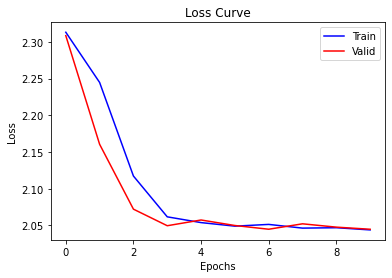

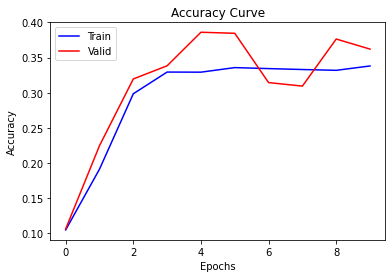

In [ ]:
# Cell 19
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 20
# Change reg to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

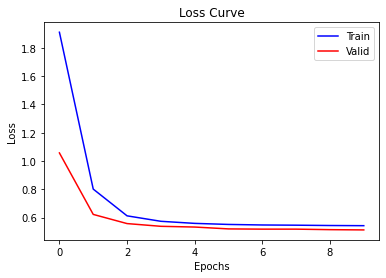

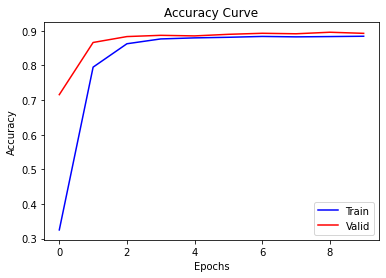

In [ ]:
# Cell 21
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 22
# Change reg to 1e-3 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

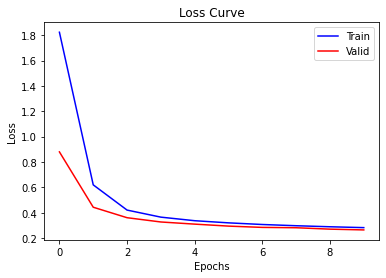

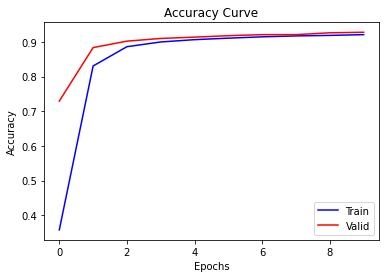

In [ ]:
# Cell 23
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 24
# Change reg to 1e-4 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

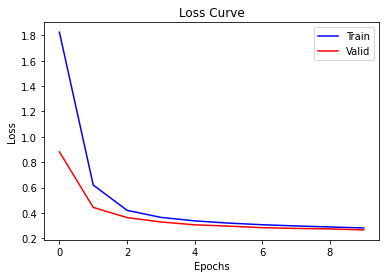

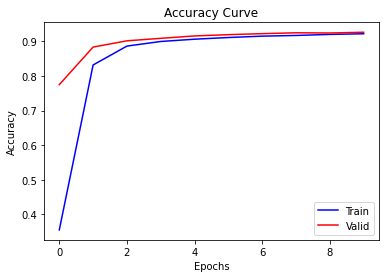

In [ ]:
# Cell 25
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 26
# Change reg to 1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

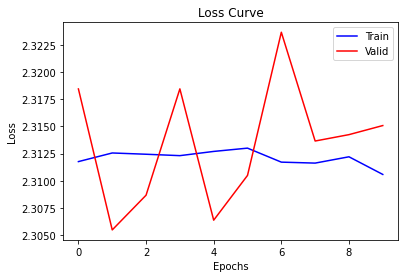

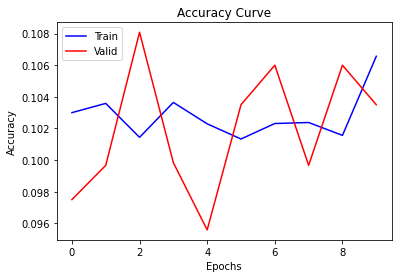

In [ ]:
# Cell 27
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here:

As shown above, increases in regularization, usually deployed to avoid overfitting, lead to much lower accuracy. In fact, this method is used to penalize the model from learning too complex patterns from the data in order to balance bias and variance. It is clear that using a very large regularization coefficient leads to having an inexpressive model, unable to accurately predict the target variable. The results above perfectly match the theoretical view about how to leverage regularization.



## Hyper-parameter Tuning

You are now free to tune any hyperparameters for better accuracy. In this block type the configuration of your best model and provide a brief explanation of why it works.

In [ ]:
# Cell 28
# hyperparameter tuning
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

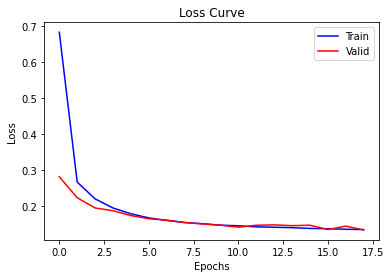

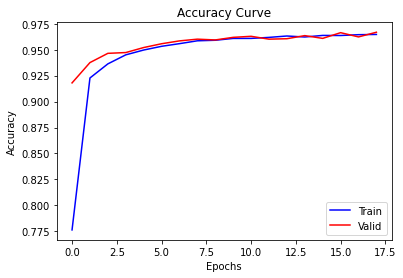

In [ ]:
# Cell 29
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here:

To conclude the inspection, I chose to set the learning rate to 0.7, the regularization coefficient to 5e-4, momentum to 0.85 and epochs to 18. 
The reasoning behind this choice is result-oriented but not completely: I obtain 96.5%, which is not the highest possible accuracy,but I can immediately spot from the plots that it yiels the maximum I can obtain before overfitting. In fact, decreasing regularization and increasing lr even further, would hit a level of accuracy that is above 98%, paying the cost of having validation curve to the train one, which means overfitting. For this, I decided to balance the model so that it can be generalizable and powerful at the same time.


In [ ]:
# Cell 30
#To collect submission
!sh collect_submission.sh

# For Windows
# ! collect_submission.bat

  adding: configs/ (stored 0%)
  adding: configs/config_softmax.yaml (deflated 25%)
  adding: configs/config_twolayer.yaml (deflated 27%)
  adding: configs/config_exp.yaml (deflated 27%)
  adding: models/ (stored 0%)
  adding: models/__init__.py (deflated 25%)
  adding: models/__pycache__/ (stored 0%)
  adding: models/__pycache__/__init__.cpython-38.pyc (deflated 20%)
  adding: models/__pycache__/softmax_regression.cpython-38.pyc (deflated 43%)
  adding: models/__pycache__/_base_network.cpython-38.pyc (deflated 60%)
  adding: models/__pycache__/two_layer_nn.cpython-38.pyc (deflated 49%)
  adding: models/_base_network.py (deflated 84%)
  adding: models/two_layer_nn.py (deflated 73%)
  adding: models/softmax_regression.py (deflated 71%)
  adding: optimizer/ (stored 0%)
  adding: optimizer/__init__.py (stored 0%)
  adding: optimizer/__pycache__/ (stored 0%)
  adding: optimizer/__pycache__/__init__.cpython-38.pyc (deflated 16%)
  adding: optimizer/__pycache__/sgd.cpython-38.pyc (deflated 3